In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Load and inspect data

In [2]:
df = pd.read_csv("data/data4a.csv")
print(len(df))
print(df.dtypes)
df.head(5)

100
N      int64
y      int64
x    float64
f     object
dtype: object


,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [3]:
df.min()

N       8
y       0
x    7.66
f       C
dtype: object

In [4]:
df.max()

N        8
y        8
x    12.44
f        T
dtype: object

In [5]:
df["f"].nunique()

2

In [6]:
def hist_density_plot(ax, data, col_name, hue):
    sns.histplot(ax=ax, data=data, stat="density", x=col_name, hue=hue, multiple="stack")
    sns.kdeplot(ax=ax, data=data, x=col_name, color='k')

def box_strip_plot(ax, data, x, y, hue):
    sns.boxplot(ax=ax, data=data, x=x, y=y, hue=hue, dodge=False)
    sns.stripplot(ax=ax, data=data, x=x, y=y, hue=hue, size=10, edgecolors='k', linewidth=1)
    
def scatter_plot(ax, data, x, y, hue):
    sns.scatterplot(
        ax=ax, 
        data=data, x=x, y=y, 
        style=hue, hue=hue, 
        markers=['o', '^'],
        s=100,
        edgecolor='k', linewidths=10
    )

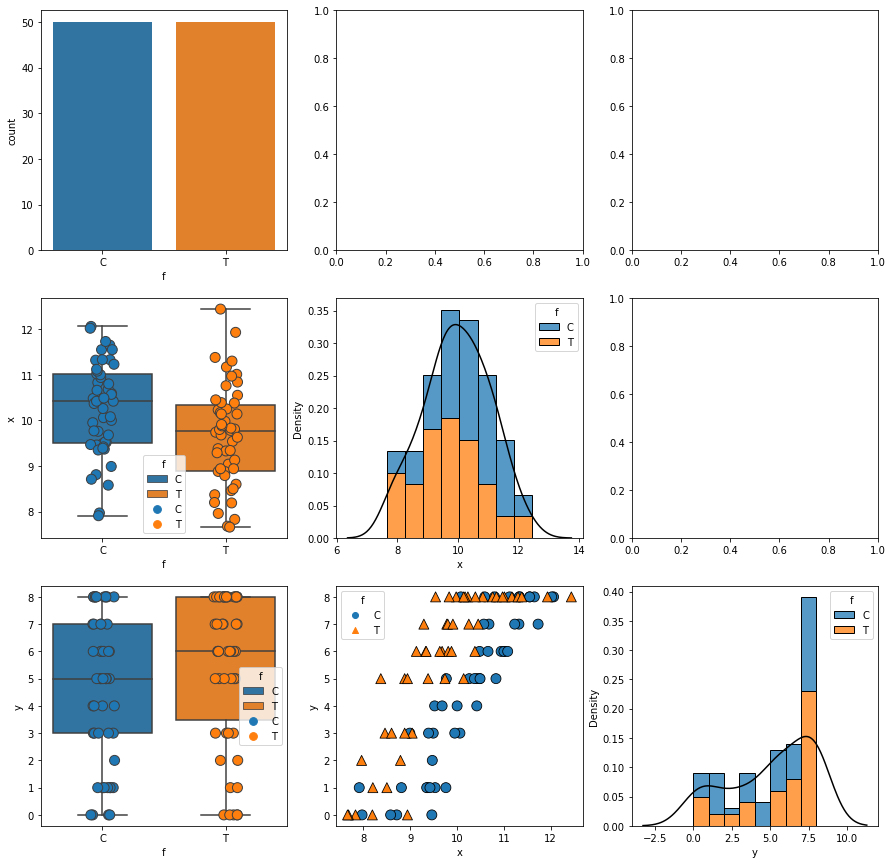

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# f
sns.countplot(ax=axes[0, 0], data=df, x="f")

# x
box_strip_plot(ax=axes[1, 0], data=df, x="f", y="x", hue="f")
hist_density_plot(ax=axes[1, 1], data=df, col_name="x", hue="f")

# y
box_strip_plot(ax=axes[2, 0], data=df, x="f", y="y", hue="f")
scatter_plot(ax=axes[2, 1], data=df, x="x", y="y", hue="f")
hist_density_plot(ax=axes[2, 2], data=df, col_name="y", hue="f")

fig.show()

# Run Stan

In [8]:
model = CmdStanModel(stan_file="model/exercise5-7.stan")
print(model)

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chapter05/model/exercise5-7
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chapter05/model/exercise5-7


CmdStanModel: name=exercise5-7
	 stan_file=/workdir/chapter05/model/exercise5-7.stan
	 exe_file=/workdir/chapter05/model/exercise5-7
	 compiler_optons=stanc_options=None, cpp_options=None


In [9]:
data = {
    "I": len(df),
    "N": df["N"].values,
    "x": df["x"].values,
    "f": [0 if fchar == 'C' else 1 for fchar in df["f"].values],
    "y": df["y"].values
}

In [10]:
fit = model.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1


# Inspect the result

In [11]:
print(fit)

CmdStanMCMC: model=exercise5-7 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmp_qmlkbun/exercise5-7-202010271150-1-752ek10b.csv
	/tmp/tmp_qmlkbun/exercise5-7-202010271150-2-71cso9xk.csv
	/tmp/tmp_qmlkbun/exercise5-7-202010271150-3-vxitfica.csv
	/tmp/tmp_qmlkbun/exercise5-7-202010271150-4-ymofo1f6.csv
 output_files:
	/tmp/tmp_qmlkbun/exercise5-7-202010271150-1-752ek10b-stdout.txt
	/tmp/tmp_qmlkbun/exercise5-7-202010271150-2-71cso9xk-stdout.txt
	/tmp/tmp_qmlkbun/exercise5-7-202010271150-3-vxitfica-stdout.txt
	/tmp/tmp_qmlkbun/exercise5-7-202010271150-4-ymofo1f6-stdout.txt


In [12]:
print(fit.num_draws)
print(fit.draws().shape)

1000
(1000, 4, 210)


In [13]:
fit.stan_variables()

{'b': array([[-17.7041 ,   1.7752 ,   1.8678 ],
        [-17.7034 ,   1.77602,   1.86875],
        [-16.9432 ,   1.70427,   1.78523],
        ...,
        [-19.2615 ,   1.92185,   2.01148],
        [-19.775  ,   1.98338,   1.95891],
        [-19.7434 ,   1.97343,   1.98663]]),
 'q': array([[0.40656 , 0.710937, 0.820723, ..., 0.508482, 0.896985, 0.321442],
        [0.408694, 0.712871, 0.822149, ..., 0.510758, 0.897915, 0.323352],
        [0.423223, 0.714536, 0.819655, ..., 0.519533, 0.893147, 0.338115],
        ...,
        [0.376546, 0.706718, 0.825223, ..., 0.482839, 0.903571, 0.286124],
        [0.397175, 0.733173, 0.846182, ..., 0.478836, 0.908491, 0.2774  ],
        [0.381601, 0.718718, 0.836007, ..., 0.471446, 0.904976, 0.272367]]),
 'y_pred': array([[0., 5., 8., ..., 2., 7., 3.],
        [5., 5., 6., ..., 4., 8., 1.],
        [1., 7., 7., ..., 2., 7., 1.],
        ...,
        [5., 7., 7., ..., 2., 6., 1.],
        [4., 5., 6., ..., 4., 4., 1.],
        [3., 6., 6., ..., 3., 8., 

In [14]:
fit_summary = fit.summary()
fit_summary

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-338.416,0.035304,1.25634,-340.899,-338.097,-337.067,1266.43,156.756,1.00092
b[1],-20.000,0.044000,1.40000,-22.000,-20.000,-17.000,1004.00,124.000,1.00000
b[2],2.000,0.004300,0.14000,1.700,2.000,2.200,1019.00,126.000,1.00000
b[3],2.000,0.006800,0.23000,1.700,2.000,2.400,1127.00,140.000,1.00000
q[1],0.380,0.000770,0.03300,0.330,0.380,0.440,1852.00,229.000,1.00000
...,...,...,...,...,...,...,...,...,...
y_pred[96],7.600,0.010000,0.63000,6.000,8.000,8.000,3880.00,480.000,1.00000
y_pred[97],3.900,0.023000,1.50000,2.000,4.000,6.000,3963.00,491.000,1.00000
y_pred[98],3.900,0.023000,1.40000,2.000,4.000,6.000,3913.00,484.000,1.00000


In [15]:
# Check the convergence
fit_summary[fit_summary["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


In [16]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmp_qmlkbun/exercise5-7-202010271150-1-752ek10b.csv, /tmp/tmp_qmlkbun/exercise5-7-202010271150-2-71cso9xk.csv, /tmp/tmp_qmlkbun/exercise5-7-202010271150-3-vxitfica.csv, /tmp/tmp_qmlkbun/exercise5-7-202010271150-4-ymofo1f6.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmp_qmlkbun/exercise5-7-202010271150-1-752ek10b.csv, /tmp/tmp_qmlkbun/exercise5-7-202010271150-2-71cso9xk.csv, /tmp/tmp_qmlkbun/exercise5-7-202010271150-3-vxitfica.csv, /tmp/tmp_qmlkbun/exercise5-7-202010271150-4-ymofo1f6.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


# Plot the result

In [17]:
y_pred_percentiles = np.percentile(fit.stan_variable("y_pred"), [10.0, 50.0, 90.0], axis=0)

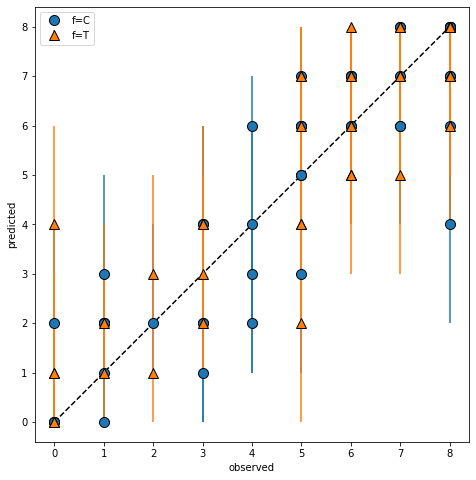

In [18]:
# observation vs. prediction

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

idx0 = np.where(df["f"].values == "C")[0]
idx1 = np.where(df["f"].values == "T")[0]

ax.errorbar(
    x=df["y"].values[idx0], 
    y=y_pred_percentiles[1][idx0], 
    yerr=np.abs(y_pred_percentiles[[0, 2]][:, idx0] - y_pred_percentiles[1][idx0]),
    fmt='o',
    markersize=10,
    markeredgecolor='k',
    label="f=C"
)

ax.errorbar(
    x=df["y"].values[idx1], 
    y=y_pred_percentiles[1][idx1], 
    yerr=np.abs(y_pred_percentiles[[0, 2]][:, idx1] - y_pred_percentiles[1][idx1]),
    fmt='^',
    markersize=10,
    markeredgecolor='k',
    label="f=T"
)

ax.legend()
ax.plot([0.0, 8.0], [0.0, 8.0], 'k--')
ax.set_aspect("equal")
ax.set_xlabel("observed")
ax.set_ylabel("predicted")
fig.show()